In [1]:
import requests

In [2]:
url = "https://cdn.nuwe.io/challenges-ds-datasets/hackathon-caixabank-data-24/train_fraud_labels.json"
response = requests.get(url)

In [3]:
# save 
with open("train_fraud_labels.json", "wb") as file:
    file.write(response.content)

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:

df_transactions = pd.read_csv('data/transactions_data.csv')

In [3]:
def earnings_and_expenses(
    df: pd.DataFrame, client_id: int, start_date: str, end_date: str
) -> pd.DataFrame:
    """
    For the period defined in between start_date and end_date (both included), get the client data available and return
    a pandas DataFrame with the Earnings and Expenses total amount for the period range and user given.The expected columns are:
        - Earnings
        - Expenses
    The DataFrame should have the columns in this order ['Earnings','Expenses']. Round the amounts to 2 decimals.

    Create a Bar Plot with the Earnings and Expenses absolute values and save it as "reports/figures/earnings_and_expenses.png" .

    Parameters
    ----------
    df : pandas DataFrame
       DataFrame of the data to be used for the agent.
    client_id : int
        Id of the client.
    start_date : str
        Start date for the date period. In the format "YYYY-MM-DD".
    end_date : str
        End date for the date period. In the format "YYYY-MM-DD".


    Returns
    -------
    Pandas Dataframe with the earnings and expenses rounded to 2 decimals.

    """

    # if df
    if  df["date"].dtype != "datetime64[ns]":
        df["date"] = pd.to_datetime(df["date"])
    if df["amount"].dtype != "float64":
        df["amount"] = df["amount"].apply(lambda x: x.replace("$", "").replace(",", "")).astype(float)

    # verify if the client_id exists
    if client_id not in df["client_id"].unique():
        raise ValueError("client_id not found in the DataFrame")

    # verify if the date range is correct
    if start_date > end_date:
        raise ValueError("Start date must be before end date")
    

    df_selected = df[(df["client_id"] == client_id) & (df["date"] >= start_date) & (df["date"] <= end_date)]
    Earnings = df_selected[df_selected["amount"] > 0]["amount"].sum()
    Expenses = -df_selected[df_selected["amount"] < 0]["amount"].sum()

    fig, ax = plt.subplots()
    ax.bar(["Earnings", "Expenses"], [Earnings, Expenses])
    plt.grid()
    plt.title("client_id: {} from {} to {}".format(client_id, start_date, end_date))
    # tick to dollars
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))
    
    return pd.DataFrame({"Earnings": [round(Earnings, 2)], "Expenses": [round(Expenses, 2)]})


In [4]:
df_transactions.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


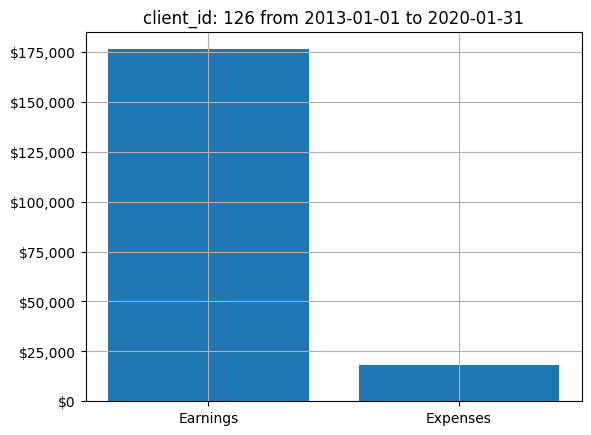

In [5]:
start_date = "2013-01-01"
end_date = "2020-01-31"

client_id = 126
df_seleted = earnings_and_expenses(df_transactions, client_id, start_date, end_date)

In [6]:
from data.data_functions import earnings_and_expenses as earnings_and_expenses_solution

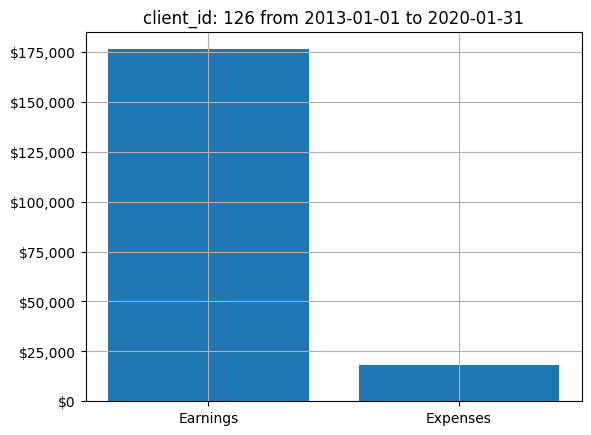

In [7]:
start_date = "2013-01-01"
end_date = "2020-01-31"

client_id = 126
df_seleted = earnings_and_expenses_solution(df_transactions, client_id, start_date, end_date)

In [8]:
df_seleted

,Earnings,Expenses
0,176279.33,-18246.0


In [9]:
expected_answer = pd.DataFrame(
    {"Earnings": [176279.33], "Expenses": [-18246.0]}
)
expected_answer

,Earnings,Expenses
0,176279.33,-18246.0


In [10]:
pd.testing.assert_frame_equal(df_seleted, expected_answer)
